In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
def read_in_network(city):
    df = pd.read_csv(f'network_data/{city}/network_subway.csv', sep = ';')
    df.index += 1
    df_nodes = pd.read_csv(f'network_data/{city}/network_nodes.csv', sep = ';')
    df_nodes.head()
    return df, df_nodes

In [33]:
berlin, berlin_nodes = read_in_network('berlin')

In [35]:
import math

# function to convert lon and lat to x and y
def convert_lon_lat_to_xy(lon, lat):
    x = lon * 20037508.34 / 180
    y = math.log(math.tan((90 + lat) * math.pi / 360)) / (math.pi / 180)
    y = y * 20037508.34 / 180
    return y, x

# convert dataset to graph with positions
def convert_to_graph(network):
    G = nx.from_pandas_edgelist(network, source='from_stop_I', target='to_stop_I', edge_attr='duration_avg')
    return G

def add_positions(G, nodes):
    # add positions to nodes from df_nodes to position dictionary
    pos = {}
    for i in range(len(nodes)):
        pos[nodes['stop_I'][i]] = convert_lon_lat_to_xy(nodes['lon'][i], nodes['lat'][i])

    # add positions to nodes in G
    for node in G.nodes():
        G.nodes[node]['pos'] = pos[node]

    return pos

def visualize(graph, pos):
    plt.figure(figsize=(12, 6))
    nx.draw_networkx(graph, pos, with_labels=False, arrows=True, 
                    node_size = 10, node_color = 'red',edge_color='grey', label='Subway stations in Berlin', width=1)
    plt.legend()

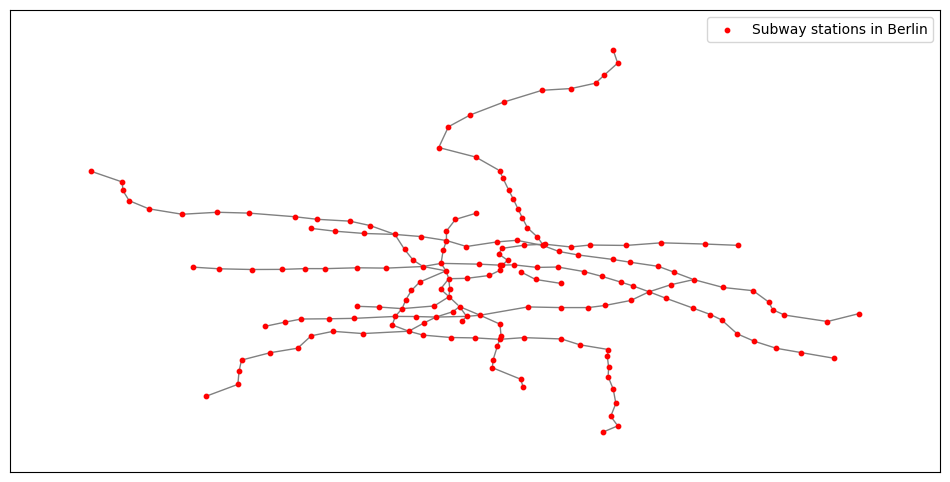

In [41]:
G = convert_to_graph(berlin)
pos = add_positions(G, berlin_nodes)
visualize(G, pos)